In [1]:
import pandas as pd
import os
os.environ[ 'MPLCONFIGDIR' ] = '/tmp/'
import matplotlib.pyplot as plt
import numpy as np

In [2]:
results_df_sklearn = pd.read_csv('AWS Results/results_df_sklearn.csv',index_col=0)
results_df_rapids = pd.read_csv('AWS Results/results_df_rapids_ml.csv',index_col=0)

In [3]:
spark = pd.read_csv('AWS Results/spark_ml_results.csv')

In [4]:
NUM_DSIZE_DOUBLINGS = 9

In [5]:
# Defining the plot that is used
def plot(axs, averages_pandas, averages_rapids, averages_spark, test):
    axs.bar(x = ind, 
            height=averages_pandas, 
            width = width, 
            color='royalblue', label='Scikit-Learn')

    axs.bar(ind+width, 
                height=averages_rapids, 
                width = width, 
                color='seagreen',label='Rapids')
    
    axs.bar(ind+width+width, 
            height=averages_spark, 
            width = width, 
            color='purple',label='Spark')

    axs.set_ylabel('Average Time (s)')
    axs.set_xlabel('Data Set Size (GB)')
    axs.xaxis.label.set_fontsize(15)
    axs.yaxis.label.set_fontsize(15)
    for item in (axs.get_xticklabels() + axs.get_yticklabels()):
        item.set_fontsize(15)
        
    axs.set_title(f"Test: {test}",fontweight="bold", fontsize=15)
    axs.legend(loc='upper left',prop={'size': 15})
    axs.set_xticks(ticks=ind + width/2, 
              labels=bar_labels)
    
    if test == 'K Nearest Neighbour':
        ax_new = fig.add_axes([0.655, 0.298, 0.3, 0.15])
        plt.ylim(0, 0.005)

    else:
        ax_new = fig.add_axes([0.655, 0.765, 0.3, 0.15])
        plt.ylim(0, 0.5)
    ax_new.bar(x = ind, 
            height=averages_pandas, 
            width = width, 
            color='royalblue', label='Scikit-Learn')

    ax_new.bar(ind+width, 
                height=averages_rapids, 
                width = width, 
                color='seagreen',label='Rapids')

    ax_new.bar(ind+width+width, 
            height=averages_spark, 
            width = width, 
            color='purple',label='Spark')

    ax_new.set_xticks([])
        
    
    
    
    return axs

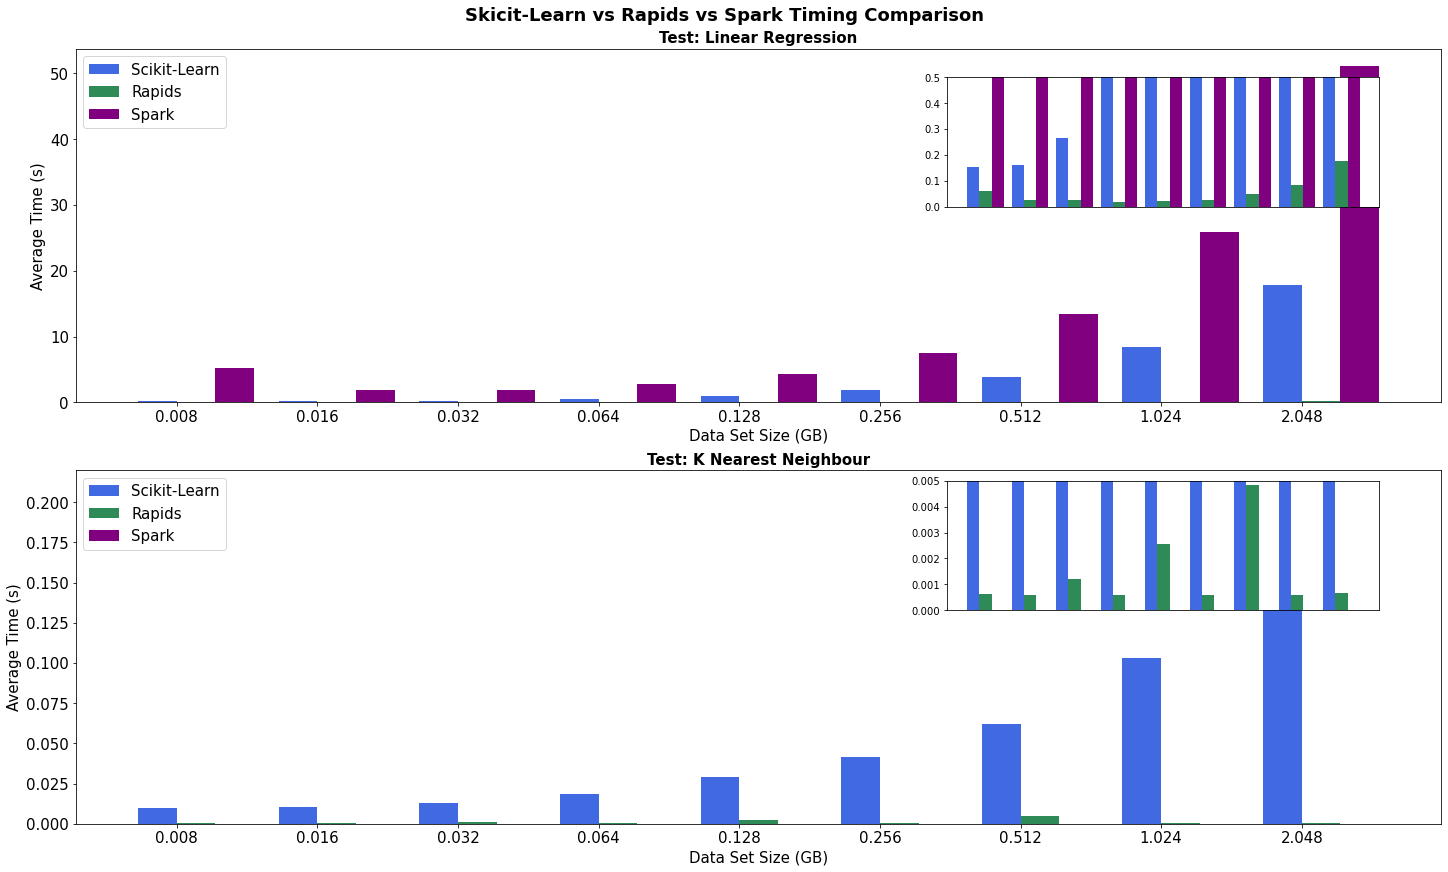

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1,constrained_layout = True)

fig.set_size_inches(20, 12)

# fig.tight_layout(pad=5)

fig.suptitle('Skicit-Learn vs Rapids vs Spark Timing Comparison', fontsize=18, fontweight="bold")

# Setting the number of bars
ind = np.arange(0, NUM_DSIZE_DOUBLINGS*2, 2)

# Defining the width between the bars
width = 0.55

# Defining the bar labels
bar_labels = np.round(results_df_sklearn['Test Size'].drop_duplicates(), 3).astype(str)

plot(ax1, 
     results_df_sklearn[results_df_sklearn['Test'] == 'Linear Regression']['Average'],
     results_df_rapids[results_df_rapids['Test'] == 'Linear Regression']['Average'],
     spark[spark['Test'] == 'Linear Regression']['Average'],
     'Linear Regression')

plot(ax2, 
     results_df_sklearn[results_df_sklearn['Test'] == 'K Nearest Neighbour']['Average'],
     results_df_rapids[results_df_rapids['Test'] == 'K Nearest Neighbour']['Average'],
     spark[spark['Test'] == 'K Nearest Neighbour']['Average'],
     'K Nearest Neighbour')
# plt.savefig('AWS Results/ml_timing.png')
plt.show()